In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from scipy import stats
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [20]:
df= pd.read_csv("bank-full.csv", delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [22]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [23]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [24]:
for i in df.columns:
    print({i:df[i].unique()})

{'age': array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)}
{'job': array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)}
{'marital': array(['married', 'single', 'divorced'], dtype=object)}
{'education': array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)}
{'default': array(['no', 'yes'], dtype=object)}
{'balance': array([ 2143,    29,     2, ...,  8205, 14204, 16353], dtype=int64)}
{'housing': array(['yes', 'no'], dtype=object)}
{'loan': array(['no', 'yes'], dtype=object)}
{'contact': array(['unknown', 'cellular', 'telephone'], d

In [25]:
catg_columns = []
for i in df.columns:
    if(df[i].dtypes == 'object'):
        catg_columns.append(i)
catg_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [26]:
df_new = df

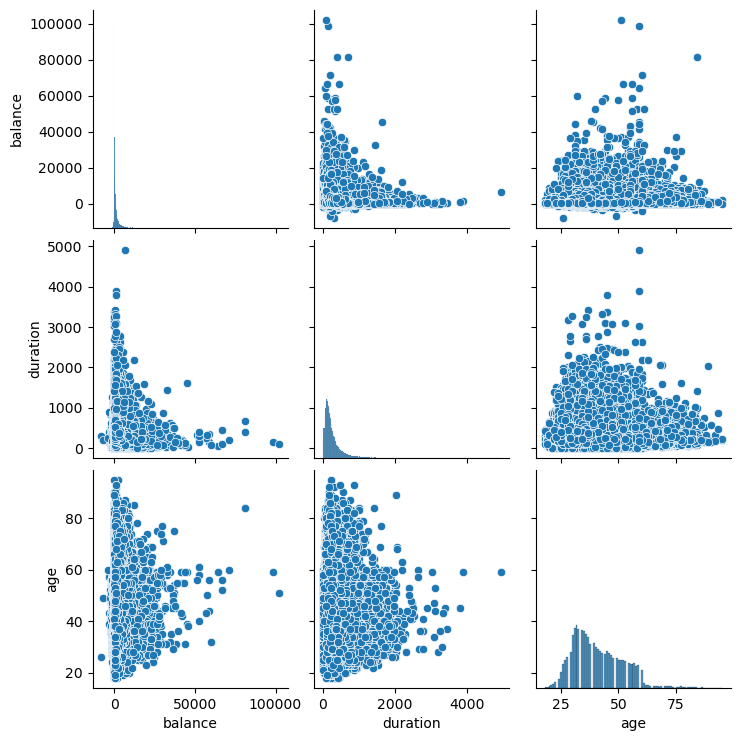

In [27]:
sns.pairplot(df_new[['balance','duration','age','job']])
plt.show()

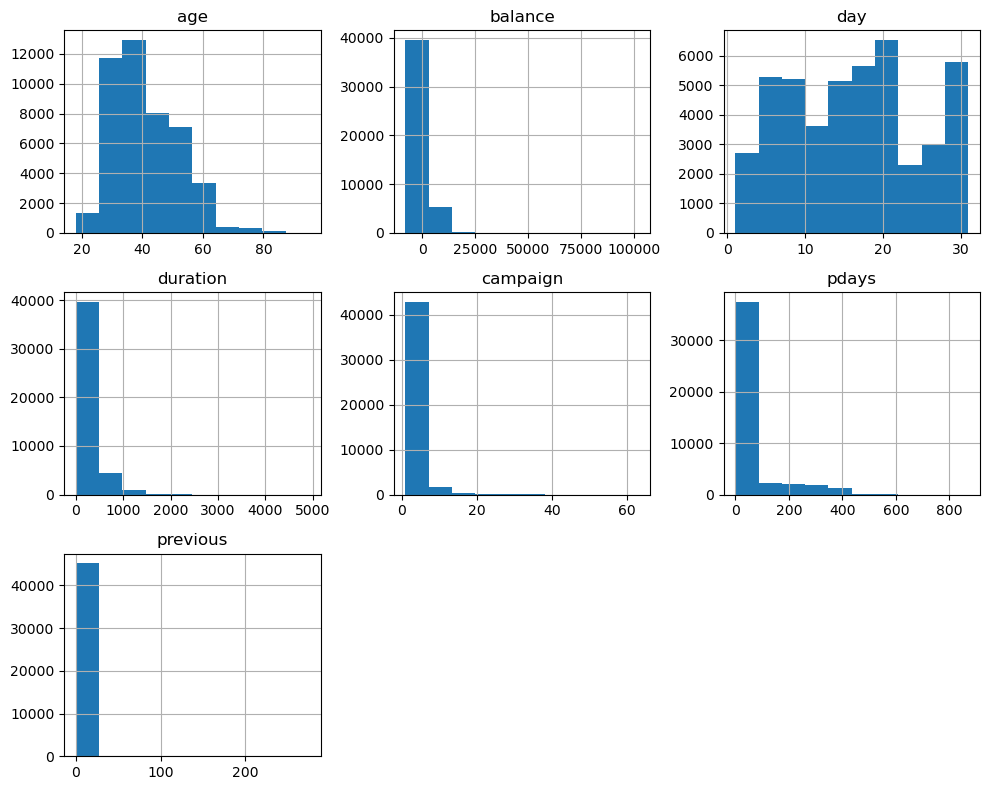

In [28]:
df_new.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [29]:
le = LabelEncoder() 
for col in catg_columns:
    df_new[col] = le.fit_transform(df_new[col])
    
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print("Feature : ", col)
    print("Transformation : ", le_name_mapping)

Feature :  job
Transformation :  {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}
Feature :  marital
Transformation :  {'divorced': 0, 'married': 1, 'single': 2}
Feature :  education
Transformation :  {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}
Feature :  default
Transformation :  {'no': 0, 'yes': 1}
Feature :  housing
Transformation :  {'no': 0, 'yes': 1}
Feature :  loan
Transformation :  {'no': 0, 'yes': 1}
Feature :  contact
Transformation :  {'cellular': 0, 'telephone': 1, 'unknown': 2}
Feature :  month
Transformation :  {'apr': 0, 'aug': 1, 'dec': 2, 'feb': 3, 'jan': 4, 'jul': 5, 'jun': 6, 'mar': 7, 'may': 8, 'nov': 9, 'oct': 10, 'sep': 11}
Feature :  poutcome
Transformation :  {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}
Feature :  y
Transformation :  {'no': 0, 'yes': 1}


In [30]:
df_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [31]:
x = df[df.columns.difference(['y'])]
y = df[['y']]

In [32]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x

array([[ 1.60696496,  0.25641925, -0.56935064, ..., -0.41145311,
         0.44489814, -0.25194037],
       [ 0.28852927, -0.43789469, -0.56935064, ..., -0.41145311,
         0.44489814, -0.25194037],
       [-0.74738448, -0.44676247, -0.56935064, ..., -0.41145311,
         0.44489814, -0.25194037],
       ...,
       [ 2.92540065,  1.42959305,  0.72181052, ...,  1.43618859,
        -0.56617504,  1.05047333],
       [ 1.51279098, -0.22802402,  0.39902023, ..., -0.41145311,
         0.44489814, -0.25194037],
       [-0.37068857,  0.52836436, -0.24656035, ...,  1.4761376 ,
        -1.57724822,  4.52357654]])

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(36168, 16)
(9043, 16)
(36168, 1)
(9043, 1)


In [34]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(list(zip(y_pred,y_test)))

[(0, 'y')]


c:\Users\amalp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
cfm = confusion_matrix(y_test,y_pred)
print(cfm)

print("classification report")
print(classification_report(y_test,y_pred))

acc = accuracy_score(y_test,y_pred)
print("Accuracy Score : ", acc)


[[7841  153]
 [ 815  234]]
classification report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7994
           1       0.60      0.22      0.33      1049

    accuracy                           0.89      9043
   macro avg       0.76      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043

Accuracy Score :  0.8929558774742895
